In [2]:
from src.ALMApy import get_k2_vs_radius
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from scipy.optimize import curve_fit, root_scalar


plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Serif"
})

### Some constants

In [3]:
G = 6.67e-11

# Dimensions
R_jupiter = 69.9e6

m_neptune = 1.024e26
R_neptune = 24.6e6
rho_neptune = m_neptune/(4*np.pi/3*R_neptune**3)

R_earth = 6378e3
M_earth = 5.972e24
rho_earth = M_earth/(4*np.pi/3*R_earth**3)

# Material properties
rho_air = 1.293
rigidity_air = 1e-7
viscosity_air = 3e-5
rigidity_earth = 1e11
viscosity_earth = 1e21

### Simulate Super-Earth

In [4]:
R_core = R_earth
rho_core = rho_earth
mu_core = rigidity_earth
eta_core = viscosity_earth
rho_atm = rho_air

max_atm_radius = 3*R_jupiter
no_atm_radii = 100
atmosphere_radii = np.logspace(-3, np.log10((max_atm_radius-R_core)/R_jupiter), no_atm_radii)*R_jupiter + R_core

k2 = get_k2_vs_radius(R_core, atmosphere_radii, [rho_atm, rho_core], [rigidity_air, mu_core], [viscosity_air, eta_core])

### Define analytical functions

In [56]:
def k2_analytical(x, k2_core, k2_f, rho_core, rho_atm):
    return (k2_core+k2_f*2/5*rho_atm/rho_core*(x**8-1))/(1+2/5*rho_atm/rho_core*(x**3-1))/x**5

def get_k2_core(R_core, mu_core, rho_core):
    g_core = 4*np.pi/3*G*rho_core*R_core
    return 3/(2*(1+19*mu_core/(2*g_core*rho_core*R_core)))

### Single fit

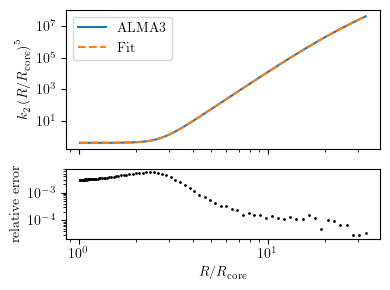

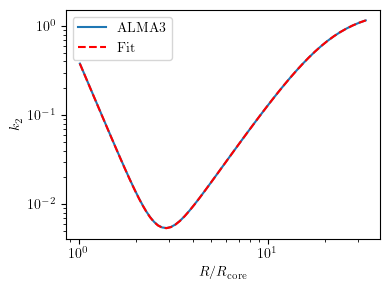

FIT PARAMETERS:
k2_core = 3.995e-01
b = 9.45e-05
a1 = 3.00e+00


In [20]:
k2_core = get_k2_core(R_core, mu_core, rho_core)
k2_f = 3/2
k2_fit = (k2_core+k2_f*2/5*rho_air/rho_core*((atmosphere_radii/R_core)**8-1))/(1+2/5*rho_air/rho_core*((atmosphere_radii/R_core)**3-1))/(atmosphere_radii/R_core)**5


fig, (ax,err_ax) = plt.subplots(figsize=(4,3), nrows=2, sharex=True, height_ratios=(2,1))
ax.plot(atmosphere_radii/R_core, k2*(atmosphere_radii/R_core)**5, label="ALMA3")
ax.plot(atmosphere_radii/R_core, k2_fit*(atmosphere_radii/R_core)**5, color="C1", linestyle="--", label=r"Fit")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylabel(r"$k_2\left(R/R_\mathrm{core}\right)^5$")

err_ax.scatter(atmosphere_radii/R_core, np.abs((k2 - k2_fit)/k2), color="black", s=1, label="error")
err_ax.set_xscale("log")
err_ax.set_yscale("log")
err_ax.set_ylabel("relative error")
err_ax.set_xlabel(r"$R/R_\mathrm{core}$")

ax.legend()

fig.tight_layout()
fig.savefig("figures/report/analytical_function.pdf")

fig, ax = plt.subplots(figsize=(4,3))
ax.plot(atmosphere_radii/R_core, k2, label="ALMA3")
ax.plot(atmosphere_radii/R_core, k2_fit, color="red", linestyle="--", label=r"Fit")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylabel(r"$k_2$")
ax.set_xlabel(r"$R/R_\mathrm{core}$")
ax.legend()
fig.tight_layout()

plt.show()

print("FIT PARAMETERS:")
print(f"k2_core = {popt[0]:.3e}")
print(f"b = {popt[1]:.2e}")
print(f"a1 = {popt[2]:.2e}")

### Varying parameters

In [58]:
no_atm_radii = 10
atm_radii = np.logspace(-3, np.log10((max_atm_radius-R_core)/R_jupiter), no_atm_radii)*R_jupiter + R_core
atm_radii_2R = np.logspace(-3, np.log10((max_atm_radius-2*R_core)/R_jupiter), no_atm_radii)*R_jupiter + 2*R_core

k2_Earth = get_k2_vs_radius(R_core, atm_radii, [rho_atm, rho_core], [rigidity_air, mu_core], [viscosity_air, eta_core])
print(0)
k2_R = get_k2_vs_radius(2*R_core, atm_radii_2R, [rho_atm, rho_core], [rigidity_air, mu_core], [viscosity_air, eta_core])
print(1)
k2_rho_atm = get_k2_vs_radius(R_core, atm_radii, [2*rho_atm, rho_core], [rigidity_air, mu_core], [viscosity_air, eta_core])
print(2)
k2_rho_core = get_k2_vs_radius(R_core, atm_radii, [rho_atm, 2*rho_core], [rigidity_air, mu_core], [viscosity_air, eta_core])
print(3)
k2_rig_core = get_k2_vs_radius(R_core, atm_radii, [rho_atm, rho_core], [rigidity_air, 2*mu_core], [viscosity_air, eta_core])
print(4)
k2_visc_core = get_k2_vs_radius(R_core, atm_radii, [rho_atm, rho_core], [rigidity_air, mu_core], [viscosity_air, 2*eta_core])
print(5)

0
1
2
3
4
5


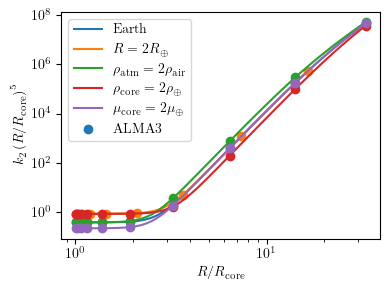

In [61]:
fig, ax = plt.subplots(figsize=(4,3))
R_interp = np.logspace(-3, np.log10((max_atm_radius-R_core)/R_jupiter), 100)*R_jupiter + R_core
ax.plot(R_interp/R_core,k2_analytical(R_interp/R_core, get_k2_core(R_core, mu_core, rho_core), 3/2, rho_core, rho_air)*(R_interp/R_core)**5, zorder=100,label="Earth")
ax.scatter(atm_radii/R_core, k2_Earth*(atm_radii/R_core)**5, zorder=100, color="C0")

R_interp_2R = np.logspace(-3, np.log10((max_atm_radius-2*R_core)/R_jupiter), 100)*R_jupiter + 2*R_core
ax.plot(R_interp_2R/(2*R_core),k2_analytical(R_interp_2R/(2*R_core), get_k2_core(2*R_core, mu_core, rho_core), 3/2, rho_core, rho_air)*(R_interp_2R/(2*R_core))**5, zorder=100,label=r"$R=2R_\oplus$")
ax.scatter(atm_radii_2R/(2*R_core), k2_R*(atm_radii_2R/(2*R_core))**5, zorder=100, color="C1")

ax.plot(R_interp/R_core,k2_analytical(R_interp/R_core, get_k2_core(R_core, mu_core, rho_core), 3/2, rho_core, 2*rho_air)*(R_interp/R_core)**5, zorder=100, color="C2", label=r"$\rho_\mathrm{atm}=2\rho_\mathrm{air}$")
ax.scatter(atm_radii/R_core, k2_rho_atm*(atm_radii/R_core)**5, zorder=100, color="C2")

ax.plot(R_interp/R_core,k2_analytical(R_interp/R_core, get_k2_core(R_core, mu_core, 2*rho_core), 3/2, 2*rho_core, rho_air)*(R_interp/R_core)**5, zorder=100, color="C3", label=r"$\rho_\mathrm{core}=2\rho_\oplus$")
ax.scatter(atm_radii/R_core, k2_rho_core*(atm_radii/R_core)**5, zorder=100, color="C3")

ax.plot(R_interp/R_core,k2_analytical(R_interp/R_core, get_k2_core(R_core, 2*mu_core, rho_core), 3/2, rho_core, rho_air)*(R_interp/R_core)**5, zorder=100, color="C4", label=r"$\mu_\mathrm{core}=2\mu_\oplus$")
ax.scatter(atm_radii/R_core, k2_rig_core*(atm_radii/R_core)**5, zorder=100, color="C4")

#ax.plot(R_interp/R_core,k2_analytical(R_interp/R_core, get_k2_core(R_core, mu_core, rho_core), 3/2, rho_core, rho_air)*(R_interp/R_core)**5, zorder=100, color="C4", label=r"$\mu_\mathrm{core}=2\mu_\oplus$")
#ax.scatter(atm_radii/R_core, k2_rig_core*(atm_radii/R_core)**5, zorder=100, color="C4")
ax.scatter([],[], label="ALMA3")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylabel(r"$k_2\left(R/R_\mathrm{core}\right)^5$")
ax.set_xlabel(r"$R/R_\mathrm{core}$")
ax.legend()
fig.tight_layout()
fig.savefig("figures/report/analytical_params.pdf")
plt.show()

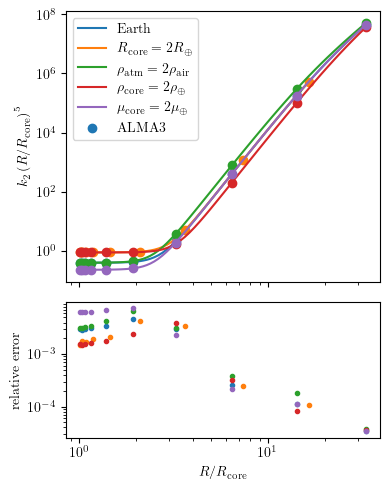

In [79]:
fig, (ax,err_ax) = plt.subplots(figsize=(4,5), nrows=2, height_ratios=(2,1), sharex=True)
R_interp = np.logspace(-3, np.log10((max_atm_radius-R_core)/R_jupiter), 100)*R_jupiter + R_core
ax.plot(R_interp/R_core,k2_analytical(R_interp/R_core, get_k2_core(R_core, mu_core, rho_core), 3/2, rho_core, rho_air)*(R_interp/R_core)**5, zorder=100,label="Earth")
ax.scatter(atm_radii/R_core, k2_Earth*(atm_radii/R_core)**5, zorder=100, color="C0")
err_ax.scatter(atm_radii/R_core, np.abs((k2_analytical(atm_radii/R_core, get_k2_core(R_core, mu_core, rho_core), 3/2, rho_core, rho_air)-k2_Earth)/(k2_Earth)), color="C0", marker='.')

R_interp_2R = np.logspace(-3, np.log10((max_atm_radius-2*R_core)/R_jupiter), 100)*R_jupiter + 2*R_core
ax.plot(R_interp_2R/(2*R_core),k2_analytical(R_interp_2R/(2*R_core), get_k2_core(2*R_core, mu_core, rho_core), 3/2, rho_core, rho_air)*(R_interp_2R/(2*R_core))**5, zorder=100,label=r"$R_\mathrm{core}=2R_\oplus$")
ax.scatter(atm_radii_2R/(2*R_core), k2_R*(atm_radii_2R/(2*R_core))**5, zorder=100, color="C1")
err_ax.scatter(atm_radii_2R/(2*R_core), np.abs((k2_analytical(atm_radii_2R/(2*R_core), get_k2_core(2*R_core, mu_core, rho_core), 3/2, rho_core, rho_air)-k2_R)/k2_R), color="C1", marker='.')

ax.plot(R_interp/R_core,k2_analytical(R_interp/R_core, get_k2_core(R_core, mu_core, rho_core), 3/2, rho_core, 2*rho_air)*(R_interp/R_core)**5, zorder=100, color="C2", label=r"$\rho_\mathrm{atm}=2\rho_\mathrm{air}$")
ax.scatter(atm_radii/R_core, k2_rho_atm*(atm_radii/R_core)**5, zorder=100, color="C2")
err_ax.scatter(atm_radii/R_core, np.abs((k2_analytical(atm_radii/R_core, get_k2_core(R_core, mu_core, rho_core), 3/2, rho_core, 2*rho_air)-k2_rho_atm)/(k2_rho_atm)), color="C2", marker='.')

ax.plot(R_interp/R_core,k2_analytical(R_interp/R_core, get_k2_core(R_core, mu_core, 2*rho_core), 3/2, 2*rho_core, rho_air)*(R_interp/R_core)**5, zorder=100, color="C3", label=r"$\rho_\mathrm{core}=2\rho_\oplus$")
ax.scatter(atm_radii/R_core, k2_rho_core*(atm_radii/R_core)**5, zorder=100, color="C3")
err_ax.scatter(atm_radii/R_core, np.abs((k2_analytical(atm_radii/R_core, get_k2_core(R_core, mu_core, 2*rho_core), 3/2, 2*rho_core, rho_air)-k2_rho_core)/(k2_rho_core)), color="C3", marker='.')

ax.plot(R_interp/R_core,k2_analytical(R_interp/R_core, get_k2_core(R_core, 2*mu_core, rho_core), 3/2, rho_core, rho_air)*(R_interp/R_core)**5, zorder=100, color="C4", label=r"$\mu_\mathrm{core}=2\mu_\oplus$")
ax.scatter(atm_radii/R_core, k2_rig_core*(atm_radii/R_core)**5, zorder=100, color="C4")
err_ax.scatter(atm_radii/R_core, np.abs((k2_analytical(atm_radii/R_core, get_k2_core(R_core, 2*mu_core, rho_core), 3/2, rho_core, rho_air)-k2_rig_core)/(k2_rig_core)), color="C4", marker='.')

#ax.plot(R_interp/R_core,k2_analytical(R_interp/R_core, get_k2_core(R_core, mu_core, rho_core), 3/2, rho_core, rho_air)*(R_interp/R_core)**5, zorder=100, color="C4", label=r"$\mu_\mathrm{core}=2\mu_\oplus$")
#ax.scatter(atm_radii/R_core, k2_rig_core*(atm_radii/R_core)**5, zorder=100, color="C4")
ax.scatter([],[], label="ALMA3")
ax.set_xscale("log")
ax.set_yscale("log")
err_ax.set_yscale("log")
ax.set_ylabel(r"$k_2\left(R/R_\mathrm{core}\right)^5$")
err_ax.set_xlabel(r"$R/R_\mathrm{core}$")
err_ax.set_ylabel("relative error")
ax.legend()
fig.tight_layout()
fig.savefig("figures/report/analytical_params.pdf")
plt.show()

### Define fit functions

$$
k_2(R)=\frac{k_2^\mathrm{core}+k_2^\mathrm{f}\frac{2}{5}\frac{\rho_\mathrm{atm}}{\rho_\mathrm{core}}\left[\left(\frac{R}{R_\mathrm{core}}\right)^8-1\right]}{1+\frac{2}{5}\frac{\rho_\mathrm{atm}}{\rho_\mathrm{core}}\left[\left(\frac{R}{R_\mathrm{core}}\right)^3-1\right]}\left(\frac{R}{R_\mathrm{core}}\right)^{-5}
$$

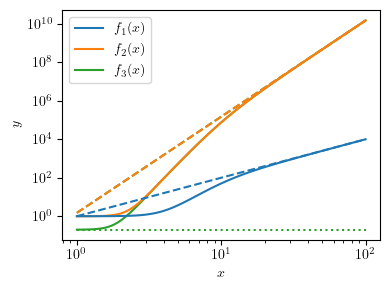

In [5]:
def y(x,rho):
    return (1+rho*(x**5-1))/(1+rho*(x**3-1))

def f2(x,rho):
    return (1+3/2*rho*(x**8-1))/(1+rho*(x**3-1))

def f3(x,rho):
    return (0.2+3/2*rho*(x**8-1))/(1+rho*(x**3-1))

x = np.logspace(0,2,100)
fig, ax = plt.subplots(figsize=(4,3))
ax.plot(x,y(x,1e-3), zorder=10, label=r"$f_1(x)$")
ax.plot(x,x**2,color="C0", zorder=10, linestyle="dashed")

ax.plot(x,f2(x,1e-3), color="C1", zorder=8, label=r"$f_2(x)$")
ax.plot(x,3/2*x**5, color="C1", zorder=8, linestyle="dashed")

ax.plot(x,f3(x,1e-3), color="C2", zorder=6, label=r"$f_3(x)$")
ax.plot(x,3/2*x**5, color="C2", zorder=6, linestyle="dashed")
ax.plot(x, 0.2+x*0, color="C2", zorder=6, linestyle="dotted")

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")

ax.legend()
fig.tight_layout()
fig.savefig("figures/report/f(x).pdf")
plt.show()

In [ ]:
def k2_func(x, k2_core, b, a1):
    k2_f = 3/2
    a2 = 5
    return (k2_core+k2_f*b*(x**(a2+a1)-1))/(1+b*(x**a1-1))/x**5

def log_k2_func(x, k2_core, b, a1):
    return np.log(k2_func(x, k2_core, b, a1))

### Single fit for Super-Earth

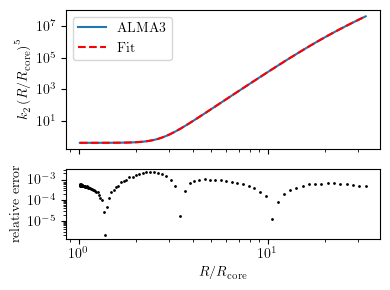

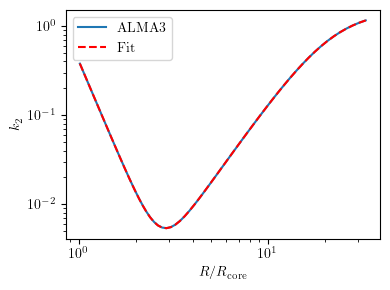

FIT PARAMETERS:
k2_core = 3.995e-01
b = 9.45e-05
a1 = 3.00e+00


In [7]:
popt,pcov = curve_fit(log_k2_func, atmosphere_radii/R_core, np.log(k2), p0=[0.399, 0.0001, 2])
k2_fit = k2_func(atmosphere_radii/R_core, *popt)

fig, (ax,err_ax) = plt.subplots(figsize=(4,3), nrows=2, sharex=True, height_ratios=(2,1))
ax.plot(atmosphere_radii/R_core, k2*(atmosphere_radii/R_core)**5, label="ALMA3")
ax.plot(atmosphere_radii/R_core, k2_fit*(atmosphere_radii/R_core)**5, color="red", linestyle="--", label=r"Fit")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylabel(r"$k_2\left(R/R_\mathrm{core}\right)^5$")

err_ax.scatter(atmosphere_radii/R_core, np.abs((k2 - k2_fit)/k2), color="black", s=1, label="error")
err_ax.set_xscale("log")
err_ax.set_yscale("log")
err_ax.set_ylabel("relative error")
err_ax.set_xlabel(r"$R/R_\mathrm{core}$")

ax.legend()

fig.tight_layout()
fig.savefig("figures/report/fit_single.pdf")



fig, ax = plt.subplots(figsize=(4,3))
ax.plot(atmosphere_radii/R_core, k2, label="ALMA3")
ax.plot(atmosphere_radii/R_core, k2_fit, color="red", linestyle="--", label=r"Fit")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylabel(r"$k_2$")
ax.set_xlabel(r"$R/R_\mathrm{core}$")
ax.legend()
fig.tight_layout()

plt.show()

print("FIT PARAMETERS:")
print(f"k2_core = {popt[0]:.3e}")
print(f"b = {popt[1]:.2e}")
print(f"a1 = {popt[2]:.2e}")

### Fixed parameters


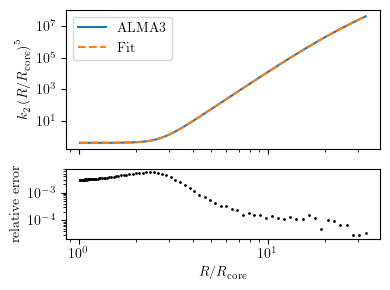

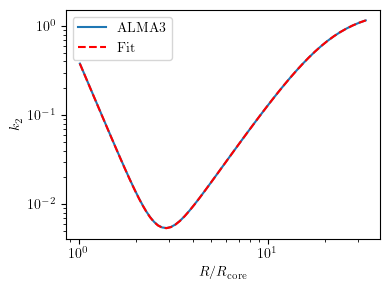

FIT PARAMETERS:
k2_core = 3.995e-01
b = 9.45e-05
a1 = 3.00e+00


### Varying $R_\mathrm{core}$

In [9]:
data_file = "super_earth"
data = np.load("data/"+data_file+".npz", allow_pickle=True)
data = data["data"]

no_atm_radii = 100
max_atm_radius = R_jupiter*3

no_core_radii = 10
min_core_radius = 0.5*R_earth
max_core_radius = 2*R_earth
core_radii = np.linspace(min_core_radius, max_core_radius, no_core_radii)
R_min = np.zeros(no_core_radii)

0.4009785765526279
0.40127820489425337
0.40153896151978236
0.40178543188973015
0.40203374561353034
0.40227396387294695
0.4025351596861252
0.4027909509646504
0.4030374959653537
0.40330707150899975


/tmp/ipykernel_1018/2724644144.py:38: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(right=0.75)


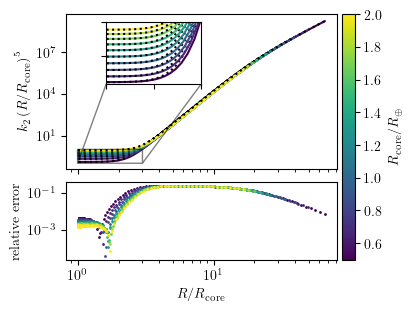

In [10]:
norm = mcolors.Normalize(vmin=min_core_radius/R_earth, vmax=max_core_radius/R_earth)
cmap = cm.viridis
fig, (ax,err_ax) = plt.subplots(figsize=(4,3), nrows=2, sharex=True, height_ratios=(2,1), constrained_layout=True)
axins = ax.inset_axes([0.15,0.55,0.35,0.4], xlim=(1e0,3e0), ylim=(1e-1,1e0))

for i,R_core in enumerate(core_radii):
    R = data[i]["radius"]
    k2 = data[i]["k2"]
    k2_core = get_k2_core(R_core, mu_core, rho_core)
    k2_fit = k2_func(R/R_core, k2_core, rho_atm/rho_core/2, 3)

    popt, pcov = curve_fit(log_k2_func, R/R_core, np.log(k2), [k2_core, rho_atm/rho_core/2, 3])
    print(popt[1]/(rho_atm/rho_core))

    ax.plot(R/R_core,k2*(R/R_core)**5, color=cmap(norm(R_core/R_earth)))
    ax.plot(R/R_core, k2_fit*(R/R_core)**5, linestyle="dotted", color="black")

    axins.plot(R/R_core, k2*(R/R_core)**5, color=cmap(norm(R_core/R_earth)))
    axins.plot(R/R_core, k2_fit*(R/R_core)**5, linestyle="dotted", color="black")

    err_ax.scatter(R/R_core, np.abs(k2*(R/R_core)**5-k2_fit*(R/R_core)**5)/(k2*(R/R_core)**5), s=1, color=cmap(norm(R_core/R_earth)))

ax.indicate_inset_zoom(axins, edgecolor="black")
axins.set_xticklabels([])
axins.set_yticklabels([])

sm = cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = plt.colorbar(sm, ax=[ax,err_ax], location="right", pad=0.02)
cbar.set_label(r"$R_\mathrm{core}/R_\oplus$")

err_ax.set_xlabel("$R/R_\\mathrm{core}$")
ax.set_ylabel("$k_2\\left(R/R_\\mathrm{core}\\right)^5$")
ax.set_xscale("log")
ax.set_yscale("log")
err_ax.set_xscale("log")
err_ax.set_yscale("log")
err_ax.set_ylabel("relative error")
fig.subplots_adjust(right=0.75)
fig.savefig("figures/report/fit_varying_R_core.pdf", dpi=300)
plt.show()

### Varying $\rho_\mathrm{core}$

In [11]:
R_core = R_earth
rho_atm = rho_air
mu_core = rigidity_earth
eta_core = viscosity_earth

no_atm_radii = 100
max_atm_radius = R_jupiter*3

no_rho_core = 10
min_rho_core = rho_earth/10
max_rho_core = rho_earth
rho_cores = np.linspace(min_rho_core, max_rho_core, no_rho_core)

atmosphere_radii = np.logspace(-3, np.log10((max_atm_radius-R_core)/R_jupiter), no_atm_radii)*R_jupiter + R_core

data = []

rerun_sim = False
data_file = "varying_core_density"
data = np.load("data/"+data_file+".npz", allow_pickle=True)
data = data["data"]

0.40113280973716925 0.0053993356811746895
0.40129839301936954 0.02136661170675063
0.4014414550624343 0.04723385350088317
0.40152892440792026 0.08196386660359661
0.4016116315266712 0.12424955144553038
0.40167313384159975 0.17262767352095815
0.4017183579088567 0.2255902489944872
0.401750628686879 0.28168025991698253
0.40177236325359134 0.3395638362083994
0.40178543188973015 0.39807654217072164


/tmp/ipykernel_1018/3412087097.py:42: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(right=0.75)


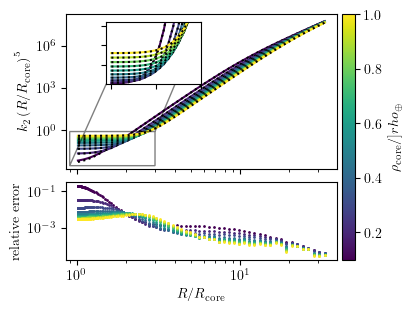

In [12]:
norm = mcolors.Normalize(vmin=min_rho_core/rho_earth, vmax=max_rho_core/rho_earth)
cmap = cm.viridis

fig, (ax,err_ax) = plt.subplots(figsize=(4,3), nrows=2, sharex=True, height_ratios=(2,1), constrained_layout=True)
axins = ax.inset_axes([0.15,0.55,0.35,0.4], xlim=(9e-1,3e0), ylim=(3e-3,8e-1))
factors = np.zeros(no_rho_core)
for i in range(no_rho_core):
    R = data[i]["radius"]
    k2 = data[i]["k2"]
    k2_core = get_k2_core(R_core, mu_core, rho_cores[i])
    k2_fit = k2_func(R/R_core, k2_core, rho_atm/rho_cores[i]*2/5, 3)

    popt, pcov = curve_fit(log_k2_func, R/R_core, np.log(k2), [k2_core, rho_atm/rho_cores[i]/2, 3])
    print(popt[1]/(rho_atm/rho_cores[i]), k2_core)
    factors[i] = popt[1]/(rho_atm/rho_cores[i])
    ax.plot(R/R_core, k2*(R/R_core)**5, color=cmap(norm(rho_cores[i]/rho_earth)))
    ax.plot(R/R_core, k2_fit*(R/R_core)**5, linestyle="dotted", color="black")

    axins.plot(R/R_core, k2*(R/R_core)**5, color=cmap(norm(rho_cores[i]/rho_earth)))
    axins.plot(R/R_core, k2_fit*(R/R_core)**5, linestyle="dotted", color="black")

    err_ax.scatter(R/R_core, np.abs(k2*(R/R_core)**5-k2_fit*(R/R_core)**5)/(k2*(R/R_core)**5), s=1, color=cmap(norm(rho_cores[i]/rho_earth)))

ax.indicate_inset_zoom(axins, edgecolor="black")

sm = cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = plt.colorbar(sm, ax=[ax,err_ax], location="right", pad=0.02)
cbar.set_label(r"$\rho_\mathrm{core}/]rho_\oplus$")

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylabel("$k_2\\left(R/R_\\mathrm{core}\\right)^5$")

err_ax.set_xscale("log")
err_ax.set_yscale("log")
err_ax.set_xlabel("$R/R_\\mathrm{core}$")
err_ax.set_ylabel("relative error")

axins.set_xticklabels([])
axins.set_yticklabels([])

fig.subplots_adjust(right=0.75)
fig.savefig("figures/report/fit_varying_R_core.pdf", dpi=300)
plt.show()

[0.39923213 0.00074711]


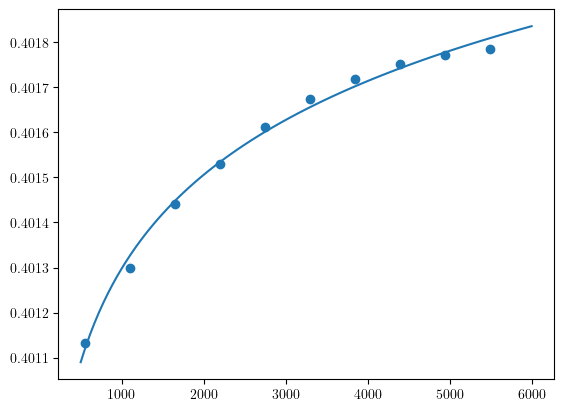

In [13]:
def linear(x,a,b):
    return a*x**b

popt, pcov = curve_fit(linear, rho_cores, factors, p0=[0.01,-0.4])

fig, ax = plt.subplots()

ax.scatter(rho_cores, factors)
#ax.set_xscale("log")
#ax.set_yscale("log")
#ax.set_xlim(0,4)
#ax.set_aspect("equal")
x = np.linspace(500,6000,100)
ax.plot(x, linear(x,*popt))
print(popt)


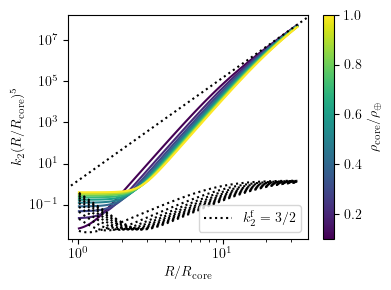

In [14]:
norm = mcolors.Normalize(vmin=min_rho_core/rho_earth, vmax=max_rho_core/rho_earth)
cmap = cm.viridis

fig, (ax) = plt.subplots(figsize=(4,3))
for i in range(no_rho_core):
    R = data[i]["radius"]
    k2 = data[i]["k2"]
    k2_core = get_k2_core(R_core, mu_core, rho_cores[i])
    k2_fit = k2_func(R/R_core, k2_core, rho_atm/rho_cores[i]/2, 3)

    ax.plot(R/R_core, k2*(R/R_core)**5, color=cmap(norm(rho_cores[i]/rho_earth)))
    ax.plot(R/R_core, k2_fit, linestyle="dotted", color="black")

    
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label(r"$\rho_\mathrm{core}/\rho_\oplus$")

R_interp = np.logspace(-1, 2, 100)
ax.plot(R_interp, 3/2*(R_core/R_interp/R_core)**-5, color="black", linestyle="dotted", label=r"$k_2^\mathrm{f}=3/2$")
#ax.axhline(get_k2_core(R_core, mu_core, rho_core), color="black", linestyle="--", label=r"$k_2^\mathrm{core}$")

ax.set_xlim(0.8494244773756144, 39.13117803315659)
ax.set_ylim(0.0022225180403935164, 175059812.96411967)

ax.set_xlabel(r"$R/R_\mathrm{core}$")
ax.set_ylabel(r"$k_2(R/R_\mathrm{core})^5$")
ax.set_xscale("log")
ax.set_yscale("log")

ax.legend(loc="lower right")
fig.tight_layout()
fig.savefig("figures/report/varying_rho_core_k2R5.pdf")
plt.show()
